|000>: (0.07001400420140048+0j)
|001>: (0.14002800840280097+0j)
|010>: (0.21004201260420147+0j)
|011>: (0.28005601680560194+0j)
|100>: (0.3500700210070024+0j)
|101>: (0.42008402520840293+0j)
|110>: (0.4900980294098034+0j)
|111>: (0.5601120336112039+0j)


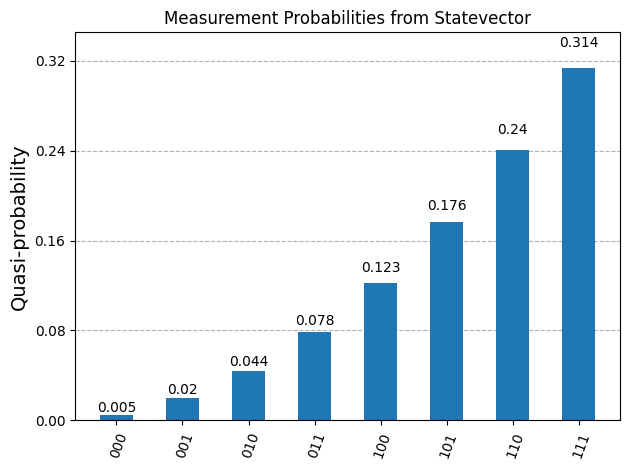

In [ ]:

import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline


amplitudes = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=complex)
amplitudes = amplitudes / np.linalg.norm(amplitudes)

#statevector
psi_sv = Statevector(amplitudes)

for i, amp in enumerate(psi_sv):
    print(f"|{format(i, '03b')}>: {amp}")

#probability dictionary
probabilities = psi_sv.probabilities_dict()

#Plot histogram
plot_histogram(probabilities, title="Measurement Probabilities from Statevector")
plt.show()


DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
|000>: (0.156494656739311+0j)
|001>: (0.5491306259156684+0j)
|010>: (-0.18079733313307297+0j)
|011>: (0.2366045498646038+0j)
|100>: (0.5629739434975396+0j)
|101>: (0.030946065709413773+0j)
|110>: (-0.5170817863661461+0j)
|111>: (-0.0049694644763748075+0j)


/tmp/ipykernel_40381/2147259510.py:23: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


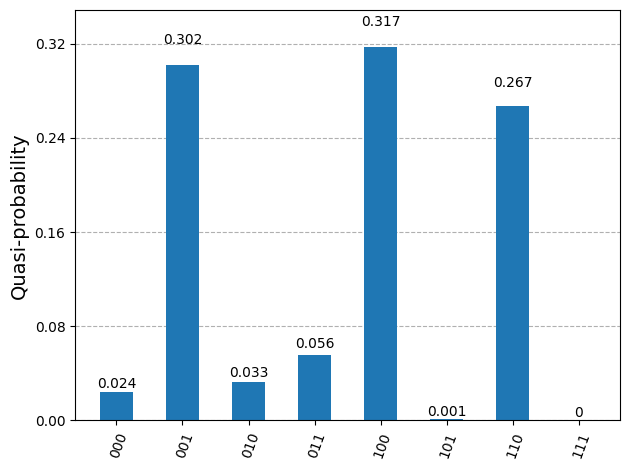

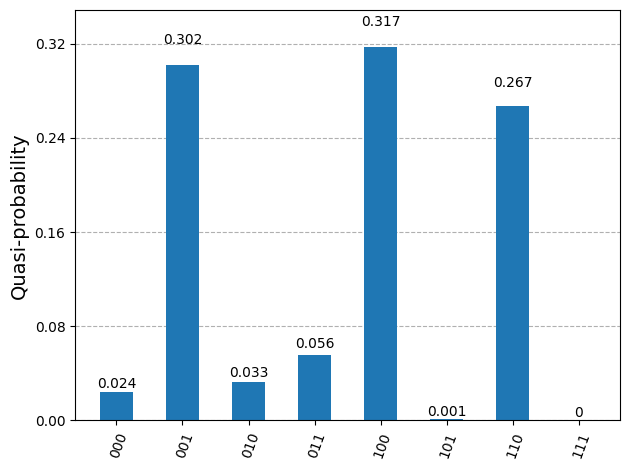

In [30]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


psi = [1, 2, 3, 4, 5, 6, 7, 8]
state = QuantumState.from_dense_data(data=psi, normalize=True)
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)



simulator = AerSimulator(method='automatic')
circuit.save_statevector()  # Save the full wavefunction


circuit = transpile(circuit, simulator)
result = simulator.run(circuit).result()

statevector = result.get_statevector()

for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")

probabilities = statevector.probabilities_dict()


plot_histogram(probabilities)



In [31]:
from qiskit.quantum_info import state_fidelity

fidelity = state_fidelity(psi_sv, statevector)
print(f"Fidelity: {fidelity:.6f}")


Fidelity: 0.004902


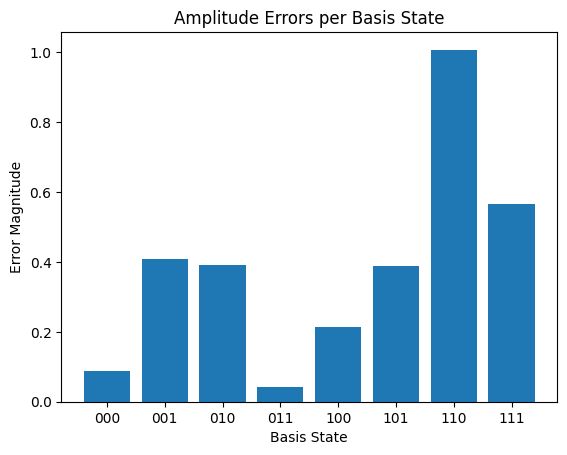

In [32]:
import matplotlib.pyplot as plt

amplitude_errors = [abs(a - b) for a, b in zip(psi_sv.data, statevector.data)]
plt.bar([f"{i:03b}" for i in range(8)], amplitude_errors)
plt.title("Amplitude Errors per Basis State")
plt.xlabel("Basis State")
plt.ylabel("Error Magnitude")
plt.show()
